In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Reading the data 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,response,make,address,all,num3d,our,over,remove,internet,order,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,1,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.0,0.925,0.000,0.000,1.833,6,11
1,2,0.0,0.0,0.00,0.0,2.94,0.00,0.0,0.00,0.0,...,0.0,0.335,0.335,0.0,0.671,0.000,0.000,4.000,12,28
2,2,0.0,0.0,1.15,0.0,0.38,0.38,0.0,0.00,0.0,...,0.0,0.000,0.196,0.0,0.261,0.000,0.000,5.666,56,272
3,2,0.1,0.3,0.40,0.0,0.20,0.90,0.2,0.50,0.8,...,0.0,0.000,0.175,0.0,0.307,0.175,0.014,6.937,669,1214
4,1,0.1,0.0,0.00,0.0,0.00,0.10,0.0,0.52,0.0,...,0.0,0.027,0.138,0.0,0.041,0.041,0.000,2.321,31,469


In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,0.00,0.0,0.00,0.00,1.65,0.00,0.00,0.00,0.82,0.0,...,0.0,0.000,0.415,0.000,0.000,0.000,0.000,1.769,11,69
1,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.191,0.000,0.000,0.766,0.000,0.000,1.000,1,18
2,0.00,0.0,0.31,0.00,0.63,0.63,0.31,0.31,0.00,0.0,...,0.0,0.000,0.108,0.000,0.000,0.163,0.054,1.515,10,144
3,0.41,0.0,0.61,0.00,0.41,0.61,0.00,0.82,0.20,0.2,...,0.0,0.000,0.099,0.000,1.689,0.132,0.000,4.913,102,565
4,0.00,0.0,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,1.024,9.752,0.003,1.542,1.785,1.998,239.571,9989,10062


## Final submission 

In [4]:
forest = RandomForestClassifier(n_estimators=3000, class_weight='balanced', criterion='entropy')

In [5]:
forest.fit(df.iloc[:,1:], df.iloc[:,0])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [10]:
pred_prob = forest.predict_proba(test)

In [11]:
pred = (pred_prob[:, 1] >= 0.60).astype(int)  # Threshold
for j in range(len(pred)):
    if pred[j] == 1:
        pred[j] = 2
    else:
        pred[j] = 1

In [ ]:
# Writing a txt file
with open('competition.txt', 'w') as file_1:
    for number in pred:
        file_1.write('%d\n' % (number))

## Notes 

n_estimators: The number of trees in the forest. The more trees you have the better the model is, but it takes more time

class_weight: If the dataset is unbalanced, meaning it has more spams than non spams or vice versa, we can weight these
              classes with a coefficient so that the dataset becomes balanced

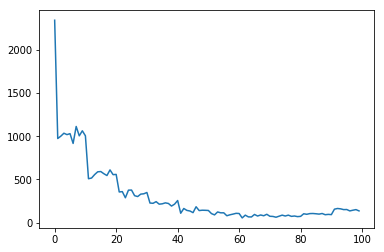

In [16]:
# Choosing the right threshold
score = []
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0])        # splitting the dataset to train and test
for i in range(100):
    threshold = i / 100                                                                 # threshold in %
    forest = RandomForestClassifier(n_estimators=10, class_weight='balanced')
    forest.fit(X_train, y_train)
    pred_prob = forest.predict_proba((X_test))
    pred = (pred_prob[:, 1] >= threshold).astype(int) 
    for j in range(len(pred)):
        if pred[j] == 1:
            pred[j] = 2
        else:
            pred[j] = 1
    confusion = confusion_matrix(y_test, pred)
    score.append(confusion[0, 1] * 5 + confusion[1, 0])
plt.plot(score)

In [17]:
# We can see that the optimal threshold is somewhere between 60 and 80. There is some randomness involved 
# in splitting the dataset so it's not always the same.